## Astronomy 406 "Computational Astrophysics" (Fall 2016)

### Homework 2 solution

Write a routine for numerical integration of an input function $f(x)$ to a user-specified accuracy $\epsilon$ using trapeziodal rule with Richardson's method.  Calculate the integral of the Gaussian function $fg(x)$ above on a grid of values $x = 0, 0.1, 0.2, ..., 6$, with $\epsilon = 10^{-10}$, and plot them as points.  Overplot the exact solution and check your accuracy.  Then calculate and plot the error $Int(numerical)-Int(exact)$.  Does it agree with the specified $\epsilon$?

In [8]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

Define the function.

In [9]:
mu = 3.
sig2 = 1.

def fg(x):    
    return np.exp(-(x-mu)**2/sig2/2.)/np.sqrt(2.*np.pi*sig2)

A simple trapezoidal routine that adds twice as many integration points as was already used in a previous iteration (a version of the routine on page 163 of NR):

In [10]:
def trapezoid(f, a, b, n, yprior):
    if n<=1:
        y = 0.5*(b-a)*(f(a)+f(b))
    else:
        it = 2**(n-2)
        h = (b-a)/it
        s = 0.
        for i in range(it):
            s += f(a+(i+0.5)*h)
        y = 0.5*(yprior+s*h)
    return y

Driver for the trapezoidal scheme that adds integration points until the answer varies by less than the specified accuracy:

In [11]:
def int_trap(f, a, b, eps):
    ntab = 25
    sprior = 0.
    for n in range(1,ntab):
        s = trapezoid(f, a, b, n, sprior)
        ds = abs(s-sprior)
        if n>4 and (ds < eps*abs(s) or s==0):
            return s, ds, n
        sprior = s
    print 'Too many steps in routine int_trap'
    return 0, 0, 0

Alternatively, we can write a driver routine for Richardson's method with linear extrapolation using last two points:

In [12]:
def int_richardson(f, a, b, eps):
    ntab = 25
    sprior = 0.
    yprior = 0.
    h = 1.
    hh = []
    ss = []
    for n in range(1,ntab):
        s = trapezoid(f, a, b, n, sprior)
        ss.append(s)
        hh.append(h)
        if n>4:
            y = ss[n-1] - hh[n-1]/(hh[n-2]-hh[n-1])*(ss[n-2]-ss[n-1])
            ds = abs(y-yprior)
            yprior = y
            if ds < eps*abs(s) or s==0:
                return s, ds, n
        h *= 0.5
        sprior = s
    print 'Too many steps in routine int_richardson'
    return 0, 0, 0

Now we are ready to evaluate the integral using both routines and plot the errors.  Note, that in the class notes I gave the analytical function corresponsing to the integral of the Gaussian from -infinity to a given x > 0.  To make it an integral over a finite range [0,x] we need to subtract the value of this function at x=0.  I should have mentioned it in class.  I know that some of you struggled with the residual error, which was yexa(0). My apologies! Of course, I will not subtract any points for that.

Adaptive Trapezoidal Method
iterations: min= 5 max= 18
estimated error: min= 0.0 max= 8.87359075108e-11
actual error: min= 0.0 max= 2.95767854652e-11
Richardson Method
iterations: min= 5 max= 19
estimated error: min= 0.0 max= 9.64028856743e-11
actual error: min= 0.0 max= 1.60643720548e-11


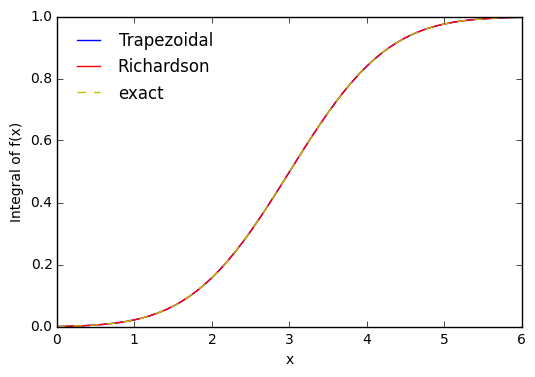

In [14]:
xx = np.arange(0,6.5,0.1)
yy1 = np.array([int_trap(fg, 0., x, 1.e-10) for x in xx])
yy2 = np.array([int_richardson(fg, 0., x, 1.e-10) for x in xx])

# exact analytical integral from 0 to x
yexa0 = special.erf(-mu/np.sqrt(2.*sig2))/2.
yexa = special.erf((xx-mu)/np.sqrt(2.*sig2))/2. - yexa0
error1 = abs(yy1[:,0]-yexa)
error2 = abs(yy2[:,0]-yexa)

print 'Adaptive Trapezoidal Method'
print 'iterations: min=', int(np.min(yy1[:,2])), 'max=', int(np.max(yy1[:,2]))
print 'estimated error: min=', np.min(yy1[:,1]), 'max=', np.max(yy1[:,1])
print 'actual error: min=', np.min(error1), 'max=', np.max(error1)

print 'Richardson Method'
print 'iterations: min=', int(np.min(yy2[:,2])), 'max=', int(np.max(yy2[:,2]))
print 'estimated error: min=', np.min(yy2[:,1]), 'max=', np.max(yy2[:,1])
print 'actual error: min=', np.min(error2), 'max=', np.max(error2)

plt.xlabel('x')
plt.ylabel('Integral of f(x)')
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.plot(xx, yy1[:,0], 'b-', label='Trapezoidal')
plt.plot(xx, yy2[:,0], 'r-', label='Richardson')
plt.plot(xx, yexa, 'y--', label='exact')
plt.legend(frameon=False, loc=2)
plt.show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log10
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log10


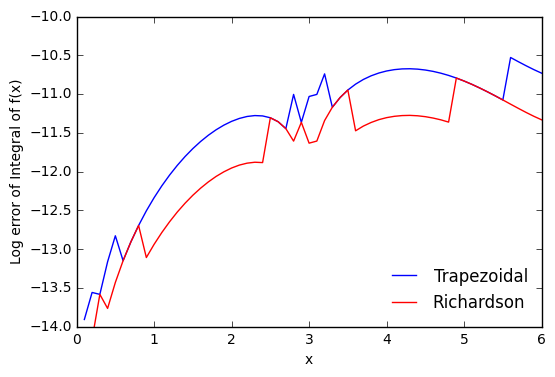

In [15]:
plt.xlabel('x')
plt.ylabel('Log error of Integral of f(x)')
plt.xlim(0, 6)
plt.ylim(-14, -10)
plt.plot(xx, np.log10(error1), 'b-', label='Trapezoidal')
plt.plot(xx, np.log10(error2), 'r-', label='Richardson')
plt.legend(frameon=False, loc=4)
plt.show()

And for future use, an open-interval routine and its driver from NR $\S$4.4, which will be useful for next homework.

In [16]:
def midpoint(f, a, b, n, yprior):
    if n<=1:
        y = (b-a)*f((a+b)/2.)
    else:
        it = 3**(n-2)
        h = (b-a)/it/3.
        s = 0.
        for i in range(it):
            s += f(a+(3*i+0.5)*h)
            s += f(a+(3*i+2.5)*h)
        y = (yprior+s*3*h)/3.
    return y

In [17]:
def int_open(f, a, b, eps):
    ntab = 25
    sprior = 0.
    for n in range(1,ntab):
        s = midpoint(f, a, b, n, sprior)
        ds = abs(s-sprior)
        if n>4 and (ds < eps*abs(s) or s==0):
            return s, ds, n
        sprior = s
    print 'Too many steps in routine int_open'
    return 0, 0, 0

Compare the result with the trapezoidal scheme:

In [18]:
int_trap(fg, -2., 8., 1.e-10)

(0.99999942666731811, 8.8611451509734707e-11, 12)

In [19]:
int_open(fg, -2., 8., 1.e-10)

(0.99999942669829578, 1.1511236408523473e-11, 9)